**Учим нейросеть определять рукописные цифры** (***MNIST***)

In [ ]:
#Импортируем необходимые библиотеки
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image

import random
import numpy as np
import matplotlib.pyplot as plt

#нужно для работы pyplot в консольном выводе Colab
%matplotlib inline 

1. Подготовка данных

In [ ]:
(x_train_base, y_train_base), (x_test_base, y_test_base) = mnist.load_data() #подгружаем данные библиотеки MNIST

<function matplotlib.pyplot.show>

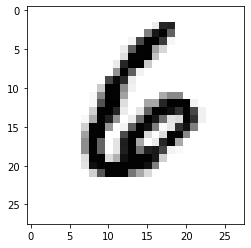

In [ ]:
plt.imshow(x_train_base[13], cmap='Greys') #посмотрим, как выглядят цифры
plt.show

In [ ]:
#данные представлены в виде матриц 28x28
x_train_base.shape

(60000, 28, 28)

In [ ]:
x_train_base[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#нормализуем их в вектора
x_train = x_train_base.reshape(60000, 784)
x_test = x_test_base.reshape(10000, 784)

x_train.shape

(60000, 784)

In [ ]:
#нормализуем их в диапазон от 0 до 1
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [ ]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#выходные данные представленны в виде чисел
y_train_base[2]

4

In [ ]:
#нормализуем выходные данные в вектор "вероятностей".
y_train = utils.to_categorical(y_train_base, 10)
y_test = utils.to_categorical(y_test_base, 10)

y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

2. Инициализация модели

In [ ]:
#создаем модель
model = Sequential()
model.add(Dense(800, input_dim = 784))#будет применена линейная активация, на вход попадает 784 значения как в наших векторах x_train
model.add(Dense(400))#будет применена линейная активация
model.add(Dense(10, activation = 'softmax'))#на выход будет подаваться вектор вероятностей

In [ ]:
model.summary()#общие данные модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


3. Компиляция модели

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
# категориальная кроссэнтропия делает наши векторы предсказания как можно ближе к векторам выходных данных
# оптимизатор Adam - оптимальный вариант
#метрика - нужна нам для оценки обучения модели

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4. Обучение модели

In [ ]:
model.fit(x_train, y_train, batch_size = 1000, epochs = 15, verbose = 1, validation_split = 0.2)
#подаем наши массивы входных и выходных данных
#batch size - разбивает пакеты наших данных на партии
#epochs - разделяет обучение на фазы и позволяет делать периодическую оценку
#verbose - просто делает полный вывод данных процесса обучения
#validation split - делит наши данные на тренировочные и проверочные в процессе обучения

Epoch 1/15
48/48 [==============================] - 1s 15ms/step - loss: 0.4937 - accuracy: 0.8500 - val_loss: 0.2988 - val_accuracy: 0.9148
Epoch 2/15
48/48 [==============================] - 1s 11ms/step - loss: 0.2992 - accuracy: 0.9163 - val_loss: 0.2843 - val_accuracy: 0.9208
Epoch 3/15
48/48 [==============================] - 1s 17ms/step - loss: 0.2856 - accuracy: 0.9197 - val_loss: 0.2822 - val_accuracy: 0.9203
Epoch 4/15
48/48 [==============================] - 1s 17ms/step - loss: 0.2826 - accuracy: 0.9203 - val_loss: 0.2793 - val_accuracy: 0.9230
Epoch 5/15
48/48 [==============================] - 1s 11ms/step - loss: 0.2740 - accuracy: 0.9234 - val_loss: 0.2795 - val_accuracy: 0.9236
Epoch 6/15
48/48 [==============================] - 1s 15ms/step - loss: 0.2757 - accuracy: 0.9226 - val_loss: 0.2770 - val_accuracy: 0.9248
Epoch 7/15
48/48 [==============================] - 1s 19ms/step - loss: 0.2683 - accuracy: 0.9252 - val_loss: 0.2794 - val_accuracy: 0.9235
Epoch 8/15
48

5. Тестирование модели на тестовой выборке

In [ ]:
model.evaluate(x_test, y_test) #проверяем точность модели на подготовленных тестовых данных 

313/313 [==============================] - 1s 4ms/step - loss: 0.2933 - accuracy: 0.9210


[0.2933450937271118, 0.9210000038146973]

In [ ]:
#проверим наглядно на 10 радомно выбранных данных

test_sample = list(zip(x_test, y_test))

for (x, y) in random.sample(test_sample, 10):
  x = np.expand_dims(x, axis = 0)
  
  print("Predict:", np.argmax(model.predict(x)))
  print('Real:', np.argmax(y))

Predict: 2
Real: 2
Predict: 7
Real: 7
Predict: 6
Real: 6
Predict: 1
Real: 1
Predict: 4
Real: 4
Predict: 8
Real: 8
Predict: 8
Real: 8
Predict: 5
Real: 5
Predict: 6
Real: 6
Predict: 8
Real: 8


6.Тестирование модели на личных примерах

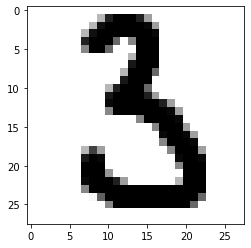

In [ ]:
#Берем картинку с Paint
#загружаем в формате массива 28х28
image = utils.load_img('Test.png', target_size=(28, 28), color_mode = 'grayscale')

plt.imshow(image.convert('RGBA'))
plt.show()

real = 3 #введите число с картинки

In [ ]:
#конвертируем и нормализуем данные
test = np.array(image)
test = test.reshape(1, 784)
test = 1 - test/255

In [ ]:
predict = model.predict(test)
predict = np.argmax(predict)
print("Predict:", predict)
print('Real:', real)

Predict: 3
Real: 3


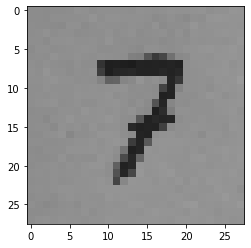

In [ ]:
#Берем фотографию
image = utils.load_img('Test2.jpg', target_size=(28, 28), color_mode = 'grayscale')

plt.imshow(image.convert('RGBA'))
plt.show()

real = 7 #введите число с картинки

In [ ]:
#преобразуем картинку в вектор-массив и преобразуем
test = np.array(image)
test = test.reshape(1, 784)
test = np.where(test > 100, 255, test)

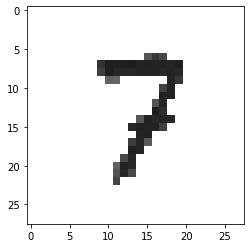

In [ ]:
#проверим
plt.imshow(Image.fromarray(test.reshape(28,28)).convert('RGBA'))
plt.show()

In [ ]:
#нормализуем и инвертируем
test = 1 - test/255


In [ ]:
predict = model.predict(test)
predict = np.argmax(predict)
print("Predict:", predict)
print('Real:', real)

Predict: 7
Real: 7
